In [1]:
import pandas as pd

#charge dataset
filepath = './online_retail.csv'
df = pd.read_csv(filepath)

## Data exploration

In [2]:
print("Information about the dataset")
print(df.info())
print("\n")
print("First 5 rows of the dataset")
print(df.head())
print("\n")
print("Description of the dataset")
print(df.describe())

Information about the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None


First 5 rows of the dataset
  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HO

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")

Number of duplicate rows: 5268


In [5]:
unique_values = {column: df[column].unique() for column in df.columns}
for column, values in unique_values.items():
    print(f"Unique values in column '{column}':")
    print(f"Number of unique values: {len(values)}")
    print(f"Unique values:  {values[:10]}")
    print("-" * 50)
    print("\n")

Unique values in column 'InvoiceNo':
Number of unique values: 25900
Unique values:  ['536365' '536366' '536367' '536368' '536369' '536370' '536371' '536372'
 '536373' '536374']
--------------------------------------------------


Unique values in column 'StockCode':
Number of unique values: 4070
Unique values:  ['85123A' '71053' '84406B' '84029G' '84029E' '22752' '21730' '22633'
 '22632' '84879']
--------------------------------------------------


Unique values in column 'Description':
Number of unique values: 4224
Unique values:  ['WHITE HANGING HEART T-LIGHT HOLDER' 'WHITE METAL LANTERN'
 'CREAM CUPID HEARTS COAT HANGER' 'KNITTED UNION FLAG HOT WATER BOTTLE'
 'RED WOOLLY HOTTIE WHITE HEART.' 'SET 7 BABUSHKA NESTING BOXES'
 'GLASS STAR FROSTED T-LIGHT HOLDER' 'HAND WARMER UNION JACK'
 'HAND WARMER RED POLKA DOT' 'ASSORTED COLOUR BIRD ORNAMENT']
--------------------------------------------------


Unique values in column 'Quantity':
Number of unique values: 722
Unique values:  [ 6  8 

## Data cleaning

In [6]:
data_cleaned = df.drop_duplicates()
data_cleaned = data_cleaned.dropna(subset=['CustomerID'])

In [7]:
data_cleaned.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [8]:
data_cleaned.duplicated().sum()

0

## Columns Agregation

In [9]:
data_cleaned['TotalAmount']  = data_cleaned['Quantity'] * data_cleaned['UnitPrice']
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [10]:
#Convertion of InvoiceDate datatype to datetime
data_cleaned['InvoiceDate'] = pd.to_datetime(data_cleaned['InvoiceDate'])
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [11]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    401604 non-null  object        
 1   StockCode    401604 non-null  object        
 2   Description  401604 non-null  object        
 3   Quantity     401604 non-null  int64         
 4   InvoiceDate  401604 non-null  datetime64[ns]
 5   UnitPrice    401604 non-null  float64       
 6   CustomerID   401604 non-null  float64       
 7   Country      401604 non-null  object        
 8   TotalAmount  401604 non-null  float64       
dtypes: datetime64[ns](1), float64(3), int64(1), object(4)
memory usage: 30.6+ MB


In [12]:
#Creating year
data_cleaned['Year'] = data_cleaned['InvoiceDate'].dt.year
data_cleaned['Month'] = data_cleaned['InvoiceDate'].dt.month
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12


## Data Analysis

In [13]:
#Total sales by year
sales_by_year = data_cleaned.groupby('Year')['TotalAmount'].sum()
sales_by_year

Year
2010     552372.860
2011    7726146.564
Name: TotalAmount, dtype: float64

In [14]:
data_cleaned['Semester'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 6 else 2)
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2


In [15]:
sales_by_semester = data_cleaned.groupby(['Year', 'Semester'])['TotalAmount'].sum()
sales_by_semester

Year  Semester
2010  2            552372.860
2011  1           3166939.041
      2           4559207.523
Name: TotalAmount, dtype: float64

In [16]:
monthly_sales = data_cleaned.groupby(['Year', 'Month'])['TotalAmount'].sum()
monthly_sales

Year  Month
2010  12        552372.860
2011  1         473731.900
      2         435534.070
      3         578576.210
      4         425222.671
      5         647011.670
      6         606862.520
      7         573112.321
      8         615078.090
      9         929356.232
      10        973306.380
      11       1126815.070
      12        341539.430
Name: TotalAmount, dtype: float64

In [17]:
data_cleaned['Trimester'] = data_cleaned['Month'].apply(lambda x: 1 if x <= 3 else (2 if x <= 6 else 3 ))
data_cleaned.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalAmount,Year,Month,Semester,Trimester
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010,12,2,3
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,3
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00,2010,12,2,3
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,3
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34,2010,12,2,3


In [18]:
trimestral_sales = data_cleaned.groupby(['Year', 'Trimester'])['TotalAmount'].sum()
trimestral_sales

Year  Trimester
2010  3             552372.860
2011  1            1487842.180
      2            1679096.861
      3            4559207.523
Name: TotalAmount, dtype: float64

## Graphics

In [19]:
total_returns = data_cleaned[data_cleaned['TotalAmount'] < 0].shape[0]
total_returns

8872

In [20]:
total_non_returns = data_cleaned[data_cleaned['TotalAmount'] >= 0].shape[0]
total_non_returns

392732

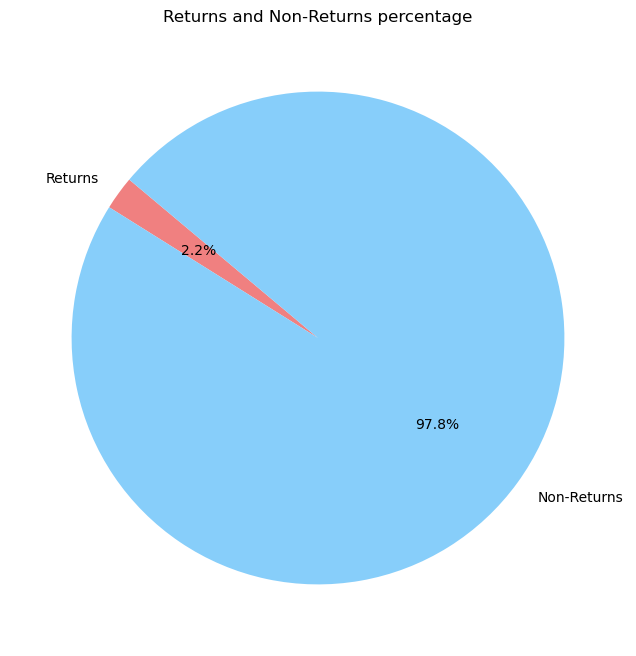

In [21]:
import matplotlib.pyplot as plt

labels = ['Returns', 'Non-Returns']
values = [total_returns, total_non_returns]
colors = ['lightcoral', 'lightskyblue']

plt.figure(figsize=(8,8))
plt.pie(values, labels=labels, colors=colors, startangle=140, autopct='%1.1f%%')

plt.title('Returns and Non-Returns percentage')
plt.show()
